In [2]:

import pandas as pd
import numpy as np
from pandas_profiling import ProfileReport
data = pd.read_csv('dataset_customer_churn.csv', sep='^')
### Essa coluna foi 'dropada' pois a correlação dela com a coluna PLANO era extremamente alta, e ela possuia diversos NAN's, que eram dados como 'Outros' em planos.
data.drop(labels=['A006_REGISTRO_ANS', 'CODIGO_BENEFICIARIO', 'CLIENTE', 'CD_USUARIO', 'FORMA_PGTO_MENSALIDADE'], axis=1, inplace=True)


In [3]:
### Remoção de dados incompletos da DataFrame.
is_NAN = data[data.isna().any(axis=1)]
data.drop(is_NAN.index, axis=0, inplace=True)

In [4]:
dict_replace = {
    "SIM": 1,
    "NAO": 0,
    'F': 0,
    'M': 1,
    'DESATIVADO': 1,
    'ATIVO': 0,

}

data.replace(dict_replace, inplace=True)


In [5]:
data_profile = ProfileReport(data)
data_profile.to_file('report_projetoWise.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

C:\Users\Ian\anaconda3\envs\projeto1_WISE\lib\site-packages\scipy\stats\stats.py:4812: RuntimeWarning: overflow encountered in longlong_scalars
  (2 * xtie * ytie) / m + x0 * y0 / (9 * m * (size - 2)))


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [4]:
data_dummified = pd.get_dummies(data)

In [5]:
data_dummified

,CD_ASSOCIADO,NUM_BENEFICIARIOS_FAMILIA,SITUACAO,IDADE,SEXO,QTDE_DIAS_ATIVO,QTDE_ATENDIMENTOS,QTDE_ATO_COBERTO_EXECUTADO,QTDE_ATO_N_COBERTO_EXECUTADO,REALIZOU_ENDODONTIA_COBERTA,...,PLANO_422427992,PLANO_475441167,PLANO_475840164,PLANO_476697161,PLANO_476698169,PLANO_481484183,PLANO_481485181,PLANO_484629190,PLANO_703454997,PLANO_OUTROS
0,1.0,1.0,1,40.0,0,277.0,1.0,8.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
1,1.0,2.0,1,56.0,0,1725.0,2.0,10.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
2,1.0,2.0,1,66.0,0,2006.0,18.0,73.0,8.0,1,...,0,0,0,0,0,0,0,0,0,0
3,1.0,3.0,1,62.0,1,529.0,1.0,1.0,0.0,0,...,1,0,0,0,0,0,0,0,0,0
4,1.0,1.0,1,47.0,1,176.0,0.0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
386387,1.0,2.0,0,26.0,0,55.0,2.0,11.0,0.0,0,...,0,0,0,0,0,0,1,0,0,0
386388,1.0,1.0,0,42.0,1,55.0,1.0,1.0,0.0,0,...,0,0,0,0,0,0,1,0,0,0
386389,1.0,2.0,0,32.0,1,55.0,3.0,7.0,0.0,1,...,0,0,0,0,0,0,1,0,0,0
386390,1.0,1.0,1,37.0,0,833.0,1.0,5.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
from sklearn.model_selection import train_test_split
x = data_dummified.drop(labels=['SITUACAO', 'QTDE_DIAS_ATIVO'], axis=1)
y = data_dummified['SITUACAO']
np.random.seed(1010)
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.2, stratify=y)

In [12]:
### Criando um baseline!
from sklearn.dummy import DummyClassifier
dummy = DummyClassifier(strategy='stratified')
dummy.fit(train_x, train_y)
dummy.score(test_x, test_y)

0.5033191423284463

In [13]:
from sklearn.ensemble import RandomForestClassifier
random_forest_classifier = RandomForestClassifier(10)
random_forest_classifier.fit(train_x,train_y)


RandomForestClassifier(n_estimators=10)

In [43]:
from sklearn.metrics import f1_score,recall_score,accuracy_score,precision_score
def all_scores(predicts, test_y):
    print(f"Accuracy Score: {accuracy_score(test_y,predicts):.3f}\nRecall Score: {recall_score(test_y,predicts):.3f}\nPrecision Score: {precision_score(test_y,predicts):.3f}\nF1 Score: {f1_score(test_y,predicts):.3f}\n")

In [44]:
all_scores(predicts_rfc, test_y)

Accuracy Score: 0.759
Recall Score: 0.834
Precision Score: 0.751
F1 Score: 0.790



In [139]:
from sklearn.model_selection import cross_validate, KFold

validation_results = cross_validate(random_forest_classifier,x,y,cv=KFold(n_splits=10, shuffle=True))


Accuracy médio 0.75
Intervalo [0.75, 0.76]


In [16]:
def scores(validation_results):
    media = validation_results['test_score'].mean()
    desvio_padrao = validation_results['test_score'].std()
    print("Accuracy médio {:.2f}".format(media))
    print("Intervalo [{:.2f}, {:.2f}]".format((media - 2 * desvio_padrao), (media + 2 * desvio_padrao)))


In [140]:
scores(validation_results)
validation_results_df = pd.DataFrame(validation_results)

In [141]:
validation_results_df

,fit_time,score_time,test_score
0,8.447049,0.172538,0.756418
1,11.545129,0.146610,0.751417
2,7.891898,0.176530,0.754341
3,7.562775,0.204455,0.754730
4,8.111309,0.140652,0.752944
5,8.625935,0.181515,0.753410
6,7.504931,0.214427,0.758456
7,9.903656,0.207954,0.753125
8,8.853219,0.177524,0.751158
9,7.361314,0.171543,0.752271


In [71]:
validation_results_dummy = cross_validate(dummy,x,y,cv=KFold(n_splits=10, shuffle=True))
scores(validation_results_dummy)
validation_results_dummy_df = pd.DataFrame(validation_results_dummy)
validation_results_dummy_df

Accuracy médio 0.50
Intervalo [0.50, 0.51]


,fit_time,score_time,test_score
0,0.308172,0.011969,0.505409
1,0.325154,0.004019,0.504982
2,0.323137,0.010970,0.501229
3,0.287754,0.002994,0.501592
4,0.291195,0.004014,0.506561
5,0.336103,0.004988,0.503688
6,0.355048,0.004987,0.507001
7,0.369567,0.003988,0.504697
8,0.352059,0.004987,0.505422
9,0.367020,0.006980,0.507027


In [113]:
feature_names = [col for col in x.columns]
importancias = random_forest_classifier.feature_importances_
std = np.std([tree.feature_importances_ for tree in random_forest_classifier.estimators_], axis=0)
feature_names = pd.Series(feature_names)
importancias

array([1.86035208e-07, 2.57755523e-02, 8.72127862e-02, 4.57798432e-03,
       4.69273148e-01, 1.89958603e-02, 2.45719130e-02, 5.03806203e-03,
       1.57215472e-02, 2.40116483e-03, 2.58404911e-02, 2.06687017e-06,
       7.45716579e-04, 2.48384338e-03, 2.65458864e-04, 3.91827588e-04,
       9.62497296e-04, 1.00909792e-04, 4.95340311e-04, 2.53915403e-03,
       6.54177434e-04, 1.37567429e-03, 5.66604276e-04, 7.27750382e-04,
       2.79747156e-03, 7.40087591e-04, 6.80160071e-04, 1.10827076e-03,
       2.43155656e-02, 4.12844185e-03, 2.61896651e-02, 1.78695011e-02,
       1.66627135e-02, 1.43326609e-05, 2.58424005e-03, 8.48141991e-02,
       7.04618172e-08, 7.16005423e-10, 5.68340085e-09, 0.00000000e+00,
       1.82848074e-06, 3.38042946e-04, 2.96300979e-06, 3.00808229e-06,
       9.26156440e-07, 1.04076586e-03, 9.18659876e-05, 8.96071375e-03,
       0.00000000e+00, 1.96598499e-03, 2.57367908e-04, 7.50212729e-04,
       1.39871416e-05, 4.98539101e-03, 1.44814916e-05, 2.75409784e-11,
      

<BarContainer object of 155 artists>

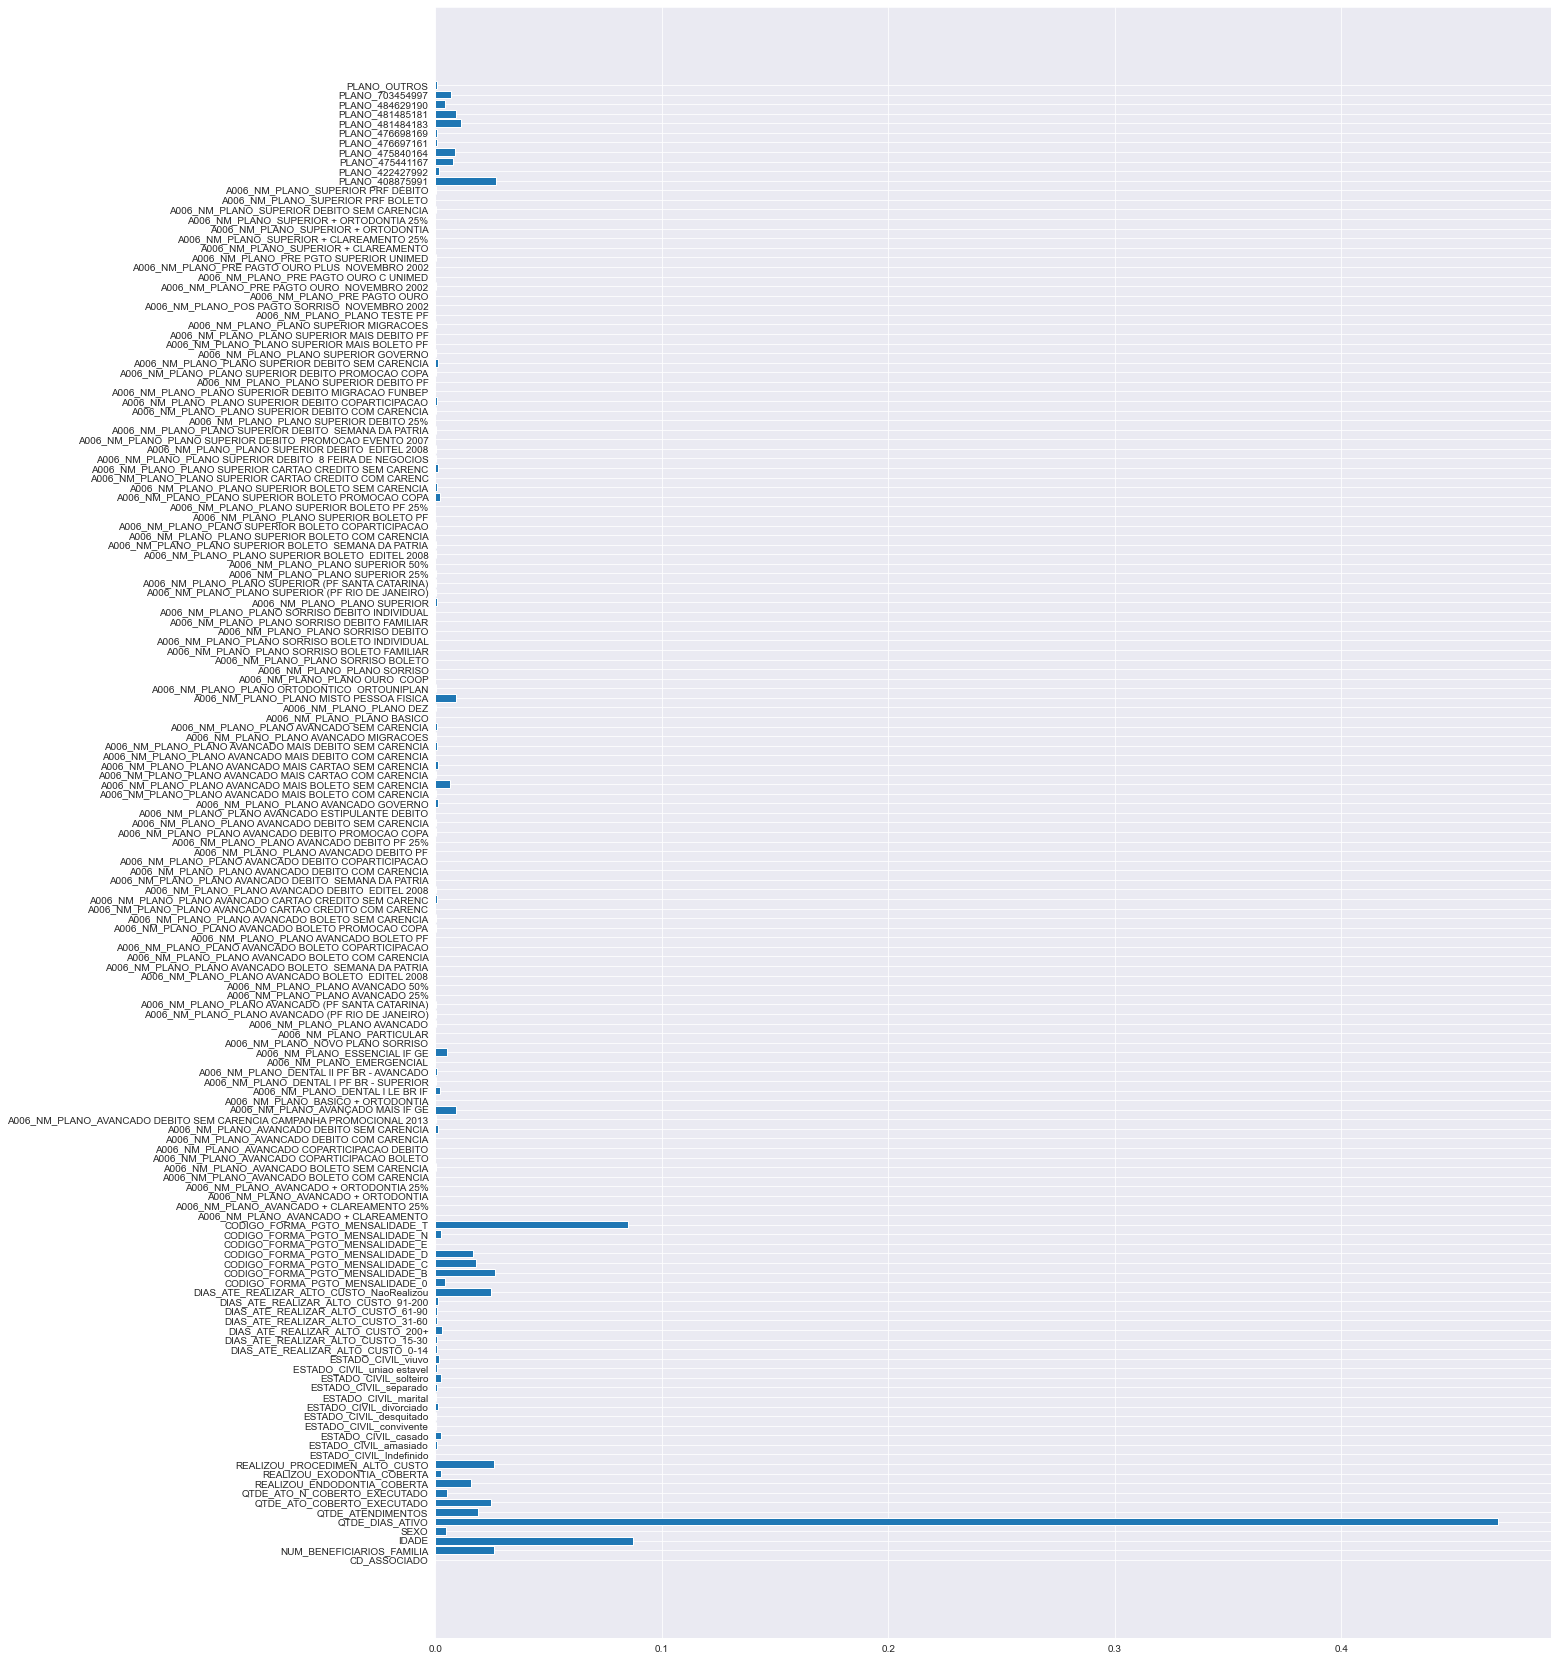

In [133]:
from matplotlib import pyplot as plt
RFC_importancias = pd.Series(importancias, index=feature_names)
plt.rcParams['figure.figsize'] = (20, 30)
plt.barh(RFC_importancias.index, RFC_importancias)

In [61]:
from sklearn.preprocessing import StandardScaler

x = data_dummified.drop(labels=['SITUACAO', 'QTDE_DIAS_ATIVO'], axis=1)
y = data_dummified['SITUACAO']
np.random.seed(1010)
standard = StandardScaler()
std_x = standard.fit_transform(x)
tt_x, val_x, tt_y, val_y = train_test_split(x, y, test_size=0.2, stratify=y)

In [19]:
from scipy.stats import randint
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV, KFold
### hiper-parametrização (?)
parametros_para_RSCV = {
    "n_estimators" : randint(10, 101),
    "max_depth" : randint(3, 100),
    "min_samples_split": randint(32, 256),
    "min_samples_leaf": randint(32, 256),
    "bootstrap" : [True, False],
    "criterion": ["gini", "entropy"]
}

RSCross_validation = RandomizedSearchCV(RandomForestClassifier(), parametros_para_RSCV, n_iter= 16, cv = KFold(n_splits = 5, shuffle=True))
RSCross_validation.fit(tt_x,tt_y)
resultados = pd.DataFrame(RSCross_validation.cv_results_)

In [21]:
RSCross_validation.best_estimator_

RandomForestClassifier(bootstrap=False, max_depth=48, min_samples_leaf=119,
                       min_samples_split=139, n_estimators=35)

In [22]:
best_random_forest = RSCross_validation.best_estimator_

In [24]:
predicts_rfc = best_random_forest.predict(val_x)

In [25]:
all_scores(predicts_rfc)

Accuracy Score: 0.759
Recall Score: 0.834
Precision Score: 0.751
F1 Score: 0.790



<BarContainer object of 154 artists>

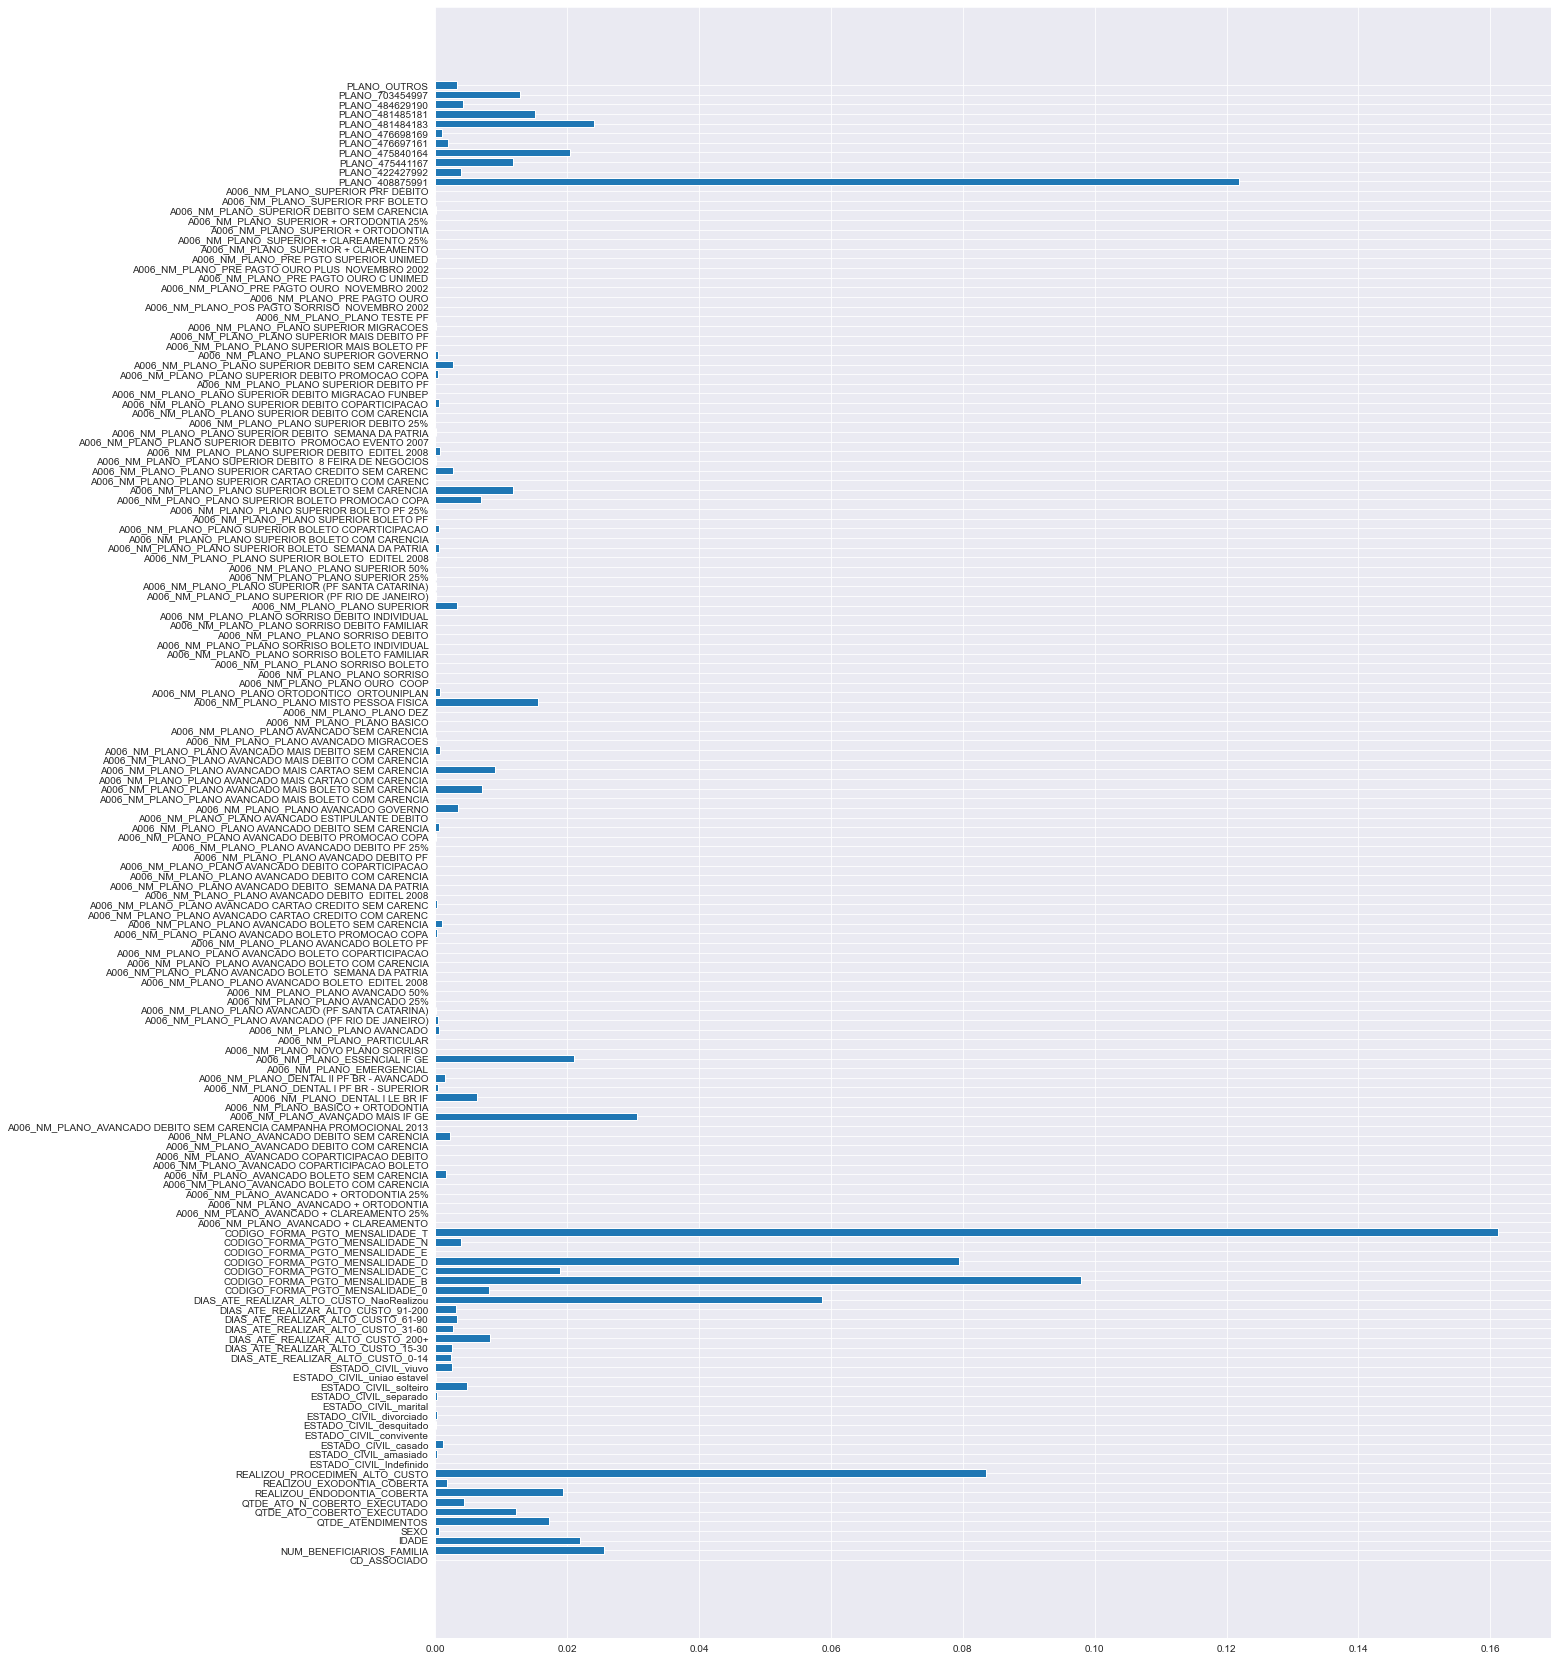

In [27]:
from matplotlib import pyplot as plt
feature_names = [col for col in x.columns]
importancias = best_random_forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in best_random_forest.estimators_], axis=0)
feature_names = pd.Series(feature_names)
RFC_importancias = pd.Series(importancias, index=feature_names)
plt.rcParams['figure.figsize'] = (20, 30)
plt.barh(RFC_importancias.index, RFC_importancias)

In [62]:
from sklearn.linear_model import LogisticRegression

logRegression = LogisticRegression(max_iter=10000)
logRegression.fit(tt_x, tt_y)

LogisticRegression(max_iter=10000)

In [63]:
logRegression_predictions = logRegression.predict(val_x)

In [64]:
all_scores(logRegression_predictions, val_y)

Accuracy Score: 0.750
Recall Score: 0.810
Precision Score: 0.751
F1 Score: 0.779



In [47]:
from sklearn.model_selection import cross_validate, KFold
logRegression_validation = cross_validate(logRegression, x, y, cv=KFold(n_splits=5, shuffle=True))
scores(logRegression_validation)

Accuracy médio 0.75
Intervalo [0.75, 0.75]


In [70]:
std_x = standard.fit_transform(x)
std_tt_x, std_val_x, tt_y, val_y = train_test_split(std_x, y, test_size=0.2, stratify=y)

logRegression = LogisticRegression(max_iter=10000)
logRegression.fit(tt_x, tt_y)

logRegression_std = LogisticRegression(max_iter=10000)
logRegression_std.fit(std_tt_x, tt_y)
logRegression_std_predictions = logRegression_std.predict(std_val_x)


In [71]:
all_scores(logRegression_std_predictions, val_y)

Accuracy Score: 0.749
Recall Score: 0.812
Precision Score: 0.749
F1 Score: 0.779



In [72]:
all_scores(logRegression_std_predictions, val_y)
all_scores(logRegression_predictions, val_y)

Accuracy Score: 0.749
Recall Score: 0.812
Precision Score: 0.749
F1 Score: 0.779

Accuracy Score: 0.506
Recall Score: 0.586
Precision Score: 0.543
F1 Score: 0.564

